# **Problem 1**


## 1.1

In [1]:
# requirement
import numpy as np
import matplotlib.pyplot as plt
import cvxpy

In [2]:
# dataset 4
n = 200
x_d4 = 3 * (np.random.rand(n, 4) - 0.5)
y_d4 = (2 * x_d4[:, 0] - 1 * x_d4[:,1] + 0.5 + 0.5 * np.random.randn(n)) > 0
y_d4 = 2 * y_d4 -1

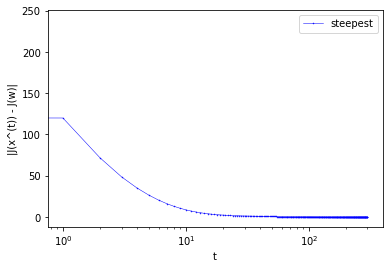

In [3]:
## batch steepest gradient discent
lam = 0.01
num_iter = 300
ww = np.array([3, 3, 3, 1])
alpha_base = 1
ll_history = []
ww_history = []
lip = 0.25 * max(max(np.linalg.eig(np.dot(x_d4.T, x_d4))[0]), 2 * lam)

for t in range(1,num_iter+1):
    wtx = np.sum(np.multiply(np.tile(ww, (n, 1)), x_d4), axis=1) #inner product of w and x
    ywtx =  y_d4 * wtx #hadamard product of y and wtx
    posterior = 1/ (1 + np.exp(-ywtx))
    yx = np.multiply(np.tile(y_d4, (ww.size, 1)).T, x_d4) #hadamard product of y(stretched to the size of weight) and x 
    direction = np.sum(-np.multiply(np.tile(1 - posterior,(ww.size, 1)).T, -yx), axis=0) + 2 * lam * ww #hadamard product of (1-posterior)(stretched to the size of weight) and yx
    ll = np.sum(np.log(1 + np.exp(-ywtx))) + lam * np.dot(ww, ww)
    ww_history.append(ww);
    ll_history.append(ll);
    ww = ww + alpha_base * 1.0 / np.sqrt(t) / lip * direction;

difference = []
for i in range(num_iter):
    difference.append(abs(ll_history[i] - ll_history[num_iter-1]))
plt.plot([t for t in range(num_iter)], difference, 'bo-', linewidth=0.5, markersize=0.5, label='steepest')
plt.legend()
plt.xlabel('t')
plt.ylabel('|J(x^(t)) - J(w)|')
plt.xscale('log')

## 1.2

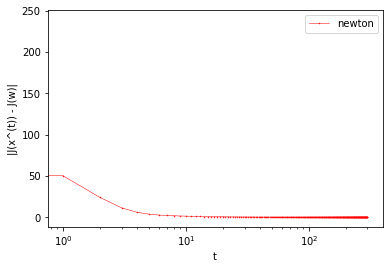

In [4]:
# newton
ll_n_history = []
ww_n_history = []
num_iter = 300
ww = np.array([3, 3, 3, 1])

for t in range(num_iter):
    wtx = np.sum(np.multiply(np.tile(ww, (n, 1)), x_d4), axis=1) #inner product of w and x
    ywtx =  y_d4 * wtx #hadamard product of y and wtx
    posterior = 1/ (1 + np.exp(-ywtx))
    yx = np.multiply(np.tile(y_d4, (ww.size, 1)).T, x_d4) #hadamard product of y(stretched to the size of weight) and x 
    grad = np.sum(np.multiply(np.tile(1 - posterior,(ww.size, 1)).T, -yx), axis=0) + 2 * lam * ww #hadamard product of (1-posterior)(stretched to the size of weight) and yx
    hess = np.sum(np.multiply(np.tile(posterior * (1 - posterior), (ww.size, 1)).T, x_d4 * x_d4), axis=0)
    ll = np.sum(np.log(1 + np.exp(-ywtx))) + lam * np.dot(ww, ww)
    ww_n_history.append(ww)
    ll_n_history.append(ll)
    ww = ww - grad/hess * 1.0 / np.sqrt(t+10)

difference_n = []
for i in range(num_iter):
    difference_n.append(abs(ll_n_history[i] - ll_n_history[num_iter-1]))
#plt.plot(ww_history, ll_history, 'bo-', linewidth=0.5, markersize=0.5, label='steepest')
plt.plot([t for t in range(num_iter)], difference_n, 'ro-', linewidth=0.5, markersize=0.5, label='newton')
plt.legend()
plt.xlabel('t')
plt.ylabel('|J(x^(t)) - J(w)|')
plt.xscale('log')

## 1.3

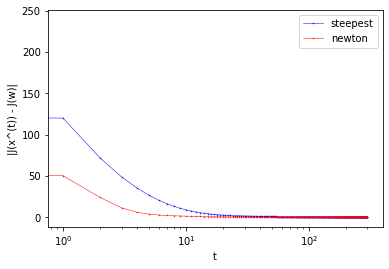

In [5]:
# compare
plt.plot([t for t in range(num_iter)], difference, 'bo-', linewidth=0.5, markersize=0.5, label='steepest')
plt.plot([t for t in range(num_iter)], difference_n, 'ro-', linewidth=0.5, markersize=0.5, label='newton')
plt.legend()
plt.xlabel('t')
plt.ylabel('|J(x^(t)) - J(w)|')
plt.xscale('log')

## 1.4

In [6]:
# dataset 5
n = 200
x_d5 = 3 * (np.random.rand(n, 4) - 0.5)
W = np.array([[ 2,  -1, 0.5],
              [-3,   2,   1],
              [ 1,   2,   3]])
y_d5 = np.argmax(np.dot(np.hstack([x_d5[:,:2], np.ones((n, 1))]), W.T)
                        + 0.5 * np.random.randn(n, 3), axis=1)

In [7]:
def to_logmat(mat):
    logmat = []
    for i in mat:
        elm = []
        for j in i: 
            if j != 0:
                elm.append(np.log(j))
            else:
                elm.append(0)
        logmat.append(elm)
    return logmat

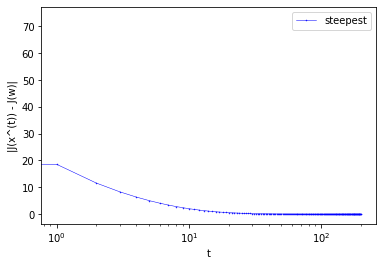

In [8]:
## batch steepest gradient discent
lam = 0.01
num_iter = 200
alpha_base = 1
ll_history = []
ww_history = []
#add bias term
W = np.array([[ 2,  -1, 0.5, 1],
              [-3,   2,   1, 1],
              [ 1,   2,   3, 1]])
lip = 0.25 * max(max(np.linalg.eig(np.dot(x_d5.T, x_d5))[0]), 2 * lam)
y_d5_oh = np.identity(3)[y_d5] #one hot

for t in range(1,num_iter+1):
    posterior = np.zeros((n, 3))
    for i in range(n):
        denom = 0.0
        for c in range(3):
            denom += np.exp(np.dot(W[c,:], x_d5[i,:]))
        for c in range(3):
            posterior[i,c] = np.exp(np.dot(W[c,:], x_d5[i,:])) / denom
    direction = np.dot((posterior - y_d5_oh).T, x_d5) + 2 * lam * W

    rt = 0 #regular term
    for c in range(3):
        rt += np.dot(W[c,:], W[c,:])

    ll = - np.sum(to_logmat(np.multiply(posterior, y_d5_oh))) + lam * rt
    ww_history.append(W);
    ll_history.append(ll);
    W = W - alpha_base * 1.0 / np.sqrt(t) / lip * direction;
    

difference = []
for i in range(num_iter):
    difference.append(abs(ll_history[i] - ll_history[num_iter-1]))
plt.plot([t for t in range(num_iter)], difference, 'bo-', linewidth=0.5, markersize=0.5, label='steepest')
plt.legend()
plt.xlabel('t')
plt.ylabel('|J(x^(t)) - J(w)|')
plt.xscale('log')

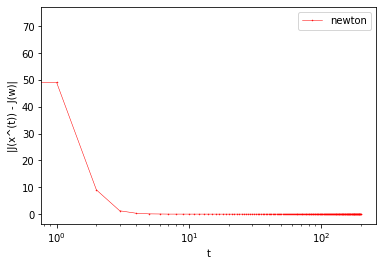

In [9]:
## newton
lam = 0.01
num_iter = 200
alpha_base = 1
ll_n_history = []
ww_n_history = []
#add bias term
W = np.array([[ 2,  -1, 0.5, 1],
              [-3,   2,   1, 1],
              [ 1,   2,   3, 1]])
y_d5_oh = np.identity(3)[y_d5] #one hot

for t in range(1,num_iter+1):
    posterior = np.zeros((n, 3))
    for i in range(n):
        denom = 0.0
        for c in range(3):
            denom += np.exp(np.dot(W[c,:], x_d5[i,:]))
        for c in range(3):
            posterior[i,c] = np.exp(np.dot(W[c,:], x_d5[i,:])) / denom

    hess = np.zeros((3*3, 4, 4))
    for j in range(3):
        for k in range(3):
            Ijk = 1 if j == k else 0
            R = np.diag(posterior[:,k] * (Ijk - posterior[:,j]))
            hess[k+j*3] = np.dot(x_d5.T, np.dot(R, x_d5))

 
    rt = 0 #regular term
    for c in range(3):
        rt += np.dot(W[c,:], W[c,:])

    ll = - np.sum(to_logmat(np.multiply(posterior, y_d5_oh))) + lam * rt
    ww_n_history.append(W)
    ll_n_history.append(ll)
    for i in range(3):
        tmp = np.dot(x_d5.T, posterior[:,i] - y_d5_oh[:,i])
        W[i,:] = W[i,:] - np.dot(np.linalg.inv(hess[i+i*3]), tmp) / np.sqrt(t) 
    

difference_n = []
for i in range(num_iter):
    difference_n.append(abs(ll_n_history[i] - ll_n_history[num_iter-1]))
plt.plot([t for t in range(num_iter)], difference_n, 'ro-', linewidth=0.5, markersize=0.5, label='newton')
plt.legend()
plt.xlabel('t')
plt.ylabel('|J(x^(t)) - J(w)|')
plt.xscale('log')

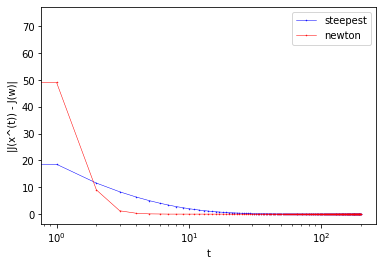

In [10]:
# compare
plt.plot([t for t in range(num_iter)], difference, 'bo-', linewidth=0.5, markersize=0.5, label='steepest')
plt.plot([t for t in range(num_iter)], difference_n, 'ro-', linewidth=0.5, markersize=0.5, label='newton')
plt.legend()
plt.xlabel('t')
plt.ylabel('|J(x^(t)) - J(w)|')
plt.xscale('log')

# **Problem 2**

## 2.1

In [11]:
# requirement
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cv
import itertools

In [12]:
def st_ops(mu, q):
  x_proj = np.zeros(mu.shape)
  for i in range(len(mu)):
    if mu[i] > q:
      x_proj[i] = mu[i] - q
    else:
      if np.abs(mu[i]) < q:
        x_proj[i] = 0
      else:
        x_proj[i] = mu[i] + q
  return x_proj

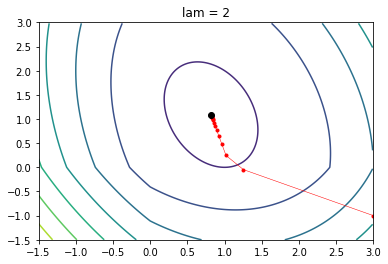

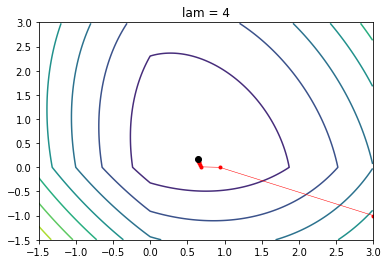

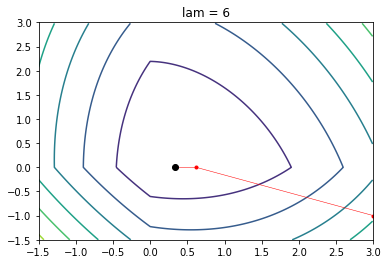

In [13]:
lam2 = 2
lam4 = 4
lam6 = 6


x_n_history = []
for lam in [2, 4, 6]:

    x_1 = np.arange(-1.5, 3, 0.01)
    x_2 = np.arange(-1.5, 3, 0.02)

    X1, X2 = np.mgrid[-1.5:3:0.01, -1.5:3:0.02]
    fValue = np.zeros((len(x_1), len(x_2)))

    A = np.array([[  3, 0.5],
                  [0.5,   1]])
    mu = np.array([[1],
                  [2]])

    for i in range(len(x_1)):
      for j in range(len(x_2)):
            inr = np.vstack([x_1[i], x_2[j]])
            fValue[i, j] = np.dot(np.dot((inr-mu).T, A), (inr- mu)) + lam * (np.abs(x_1[i]) + np.abs(x_2[j]))

    # cvx
    w_lasso = cv.Variable((2,1))
    obj_fn = cv.quad_form(w_lasso - mu, A) +  lam * cv.norm(w_lasso, 1)
    objective = cv.Minimize(obj_fn)
    constraints = []
    prob = cv.Problem(objective, constraints)
    result = prob.solve(solver=cv.CVXOPT) 
    w_lasso = w_lasso.value

    plt.contour(X1, X2, fValue)

    x_init = np.array([[ 3],
                      [-1]])
    L = 1.01 * np.max(np.linalg.eig(2 * A)[0])

    x_history = []
    xt = x_init
    for t in range(1000):
      x_history.append(xt.T)
      grad = 2 * np.dot(A, xt-mu)
      xth = xt - 1/L * grad
      xt = st_ops(xth, lam * 1 / L)

    x_history = np.vstack(x_history)
      
    plt.plot(x_history[:,0], x_history[:,1], 'ro-', markersize=3, linewidth=0.5)
    plt.plot(w_lasso[0], w_lasso[1], 'ko')

    plt.xlim(-1.5, 3)
    plt.ylim(-1.5, 3)
    plt.title('lam = {}'.format(lam))
    plt.show()

    x_n_history.append(x_history)

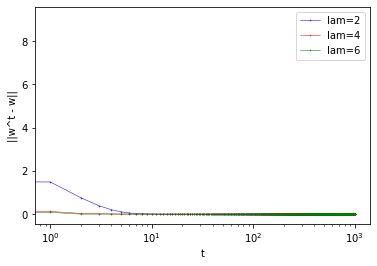

In [14]:
plt.plot([t for t in range(1000)], [np.sum((x_n_history[0][999] - i)**2) for i in x_n_history[0]], 'bo-', linewidth=0.5, markersize=0.5, label='lam=2')
plt.plot([t for t in range(1000)], [np.sum((x_n_history[1][999] - i)**2) for i in x_n_history[1]], 'ro-', linewidth=0.5, markersize=0.5, label='lam=4')
plt.plot([t for t in range(1000)], [np.sum((x_n_history[2][999] - i)**2) for i in x_n_history[2]], 'go-', linewidth=0.5, markersize=0.5, label='lam=6')
plt.legend()
plt.xlabel('t')
plt.ylabel('||w^t - w||')
plt.xscale('log')